In [ ]:
import pandas as pd
from dateutil import parser
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

from dateutil import parser
import re
from collections import Counter

In [ ]:
!pip install pyspellchecker
!pip install fuzzywuzzy

In [ ]:
from spellchecker import SpellChecker
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date__20231120.csv') #Sample Data
df = pd.read_csv('/content/NYPD_Complaint_Data_Current__Year_To_Date__20231208.csv') #Main Dataset

<ipython-input-16-d2e464852a85>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/NYPD_Complaint_Data_Current__Year_To_Date__20231208.csv') #Main Dataset


In [ ]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,270652286,43.0,BRONX,07/01/2023,05:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,1020219.0,239110.0,40.822912,-73.870041,"(40.8229123084767, -73.8700413043181)",POINT (-73.8700413043181 40.8229123084767)
1,269679657H1,NaN,MANHATTAN,06/09/2023,08:13:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
2,270825324,122.0,STATEN ISLAND,07/02/2023,19:30:00,07/02/2023,20:00:00,COMPLETED,(null),NaN,...,NaN,25-44,WHITE,F,946681.0,142778.0,40.558491,-74.135201,"(40.558491, -74.135201)",POINT (-74.135201 40.558491)
3,274700214,1.0,MANHATTAN,09/19/2023,18:05:00,09/19/2023,20:15:00,COMPLETED,(null),NaN,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,980863.0,198480.0,40.711458,-74.012216,"(40.711458, -74.012216)",POINT (-74.012216 40.711458)
4,272352661,123.0,STATEN ISLAND,08/03/2023,17:20:00,08/03/2023,17:35:00,COMPLETED,(null),NaN,...,NaN,18-24,WHITE,F,926582.0,136703.0,40.541709,-74.207482,"(40.541709, -74.207482)",POINT (-74.207482 40.541709)


In [ ]:
#Null values
def count_null_values(csv_file_path):
    df = pd.read_csv(csv_file_path)
    null_counts = df.isnull().sum()
    #print("Number of null values in each column:")
    #print(null_counts)
    total_null_values = df.isnull().sum().sum()
    #print(f"\nTotal number of null values in the DataFrame: {total_null_values}")
    return null_counts

#count_null_values('/content/NYPD_Arrest_Data__Year_to_Date__20231120.csv')

In [ ]:
#CHECK PRESENCE OF DUPLICATES
def duplicate_data(dataframe):
  duplicate_count = dataframe[dataframe.duplicated()].shape[0]
  print("Count of duplicate rows:", duplicate_count)
  return duplicate_count

duplicate_data(df)

Count of duplicate rows: 0


0

In [ ]:
#Misspelling

def is_date(value):
    try:
        parser.parse(value)
        return True
    except (ValueError, TypeError):
        return False

def check_spelling(dataframe):
    spell = SpellChecker()
    alphabet_characters = [chr(i) for i in range(ord('a'), ord('z') + 1)]
    spell.word_frequency.load_words(alphabet_characters)

    for column in dataframe.columns:
        if dataframe[column].dtype != 'O':  # Skip non-string columns
            print(f"Skipping column '{column}' as it is not a string column.")
            continue
        # Skip columns with date values
        if any(dataframe[column].apply(is_date)):
            print(f"Skipping column '{column}' as it contains date values.")
            continue
        def has_mix_of_chars_and_ints(value):
          return any(c.isalpha() for c in value) and any(c.isdigit() for c in value)

        # Apply the function to each value in the column
        # df[column] = df[column].apply(has_mix_of_chars_and_ints)
        alphanumeric_percentage = df[column].apply(has_mix_of_chars_and_ints).mean() * 100

        # Check if the percentage is greater than or equal to 90%
        if alphanumeric_percentage >= 90:
          print(f"Skipping column '{column}' as the maximum values have alphanumeric type.")
          continue

        print(f"Checking misspellings in column '{column}':")

        # Split strings by commas and flatten the list of words
        words = [word.strip() for cell in dataframe[column].astype(str) for word in re.split(r'[ +<>?&,/\()s;-]+',cell)]

        # Find misspelled words
        misspelled = spell.unknown(words)

        # Print misspelled words
        if misspelled:
            print(f"Misspelled words: {misspelled}")
        else:
            print("No misspellings found in this column.")

        print("=" * 50)

# Load your CSV dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
csv_path = '/content/NYPD_Complaint_Data_Current__Year_To_Date__20231208.csv'
df = pd.read_csv(csv_path)

# Call the function to check misspellings
check_spelling(df)


<ipython-input-20-caed54ff3ab2>:54: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


TypeError: ignored

In [ ]:
#OUTLIER DETECTION

def outlier_detection(dataframe):
  numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

  # dataframe[numeric_columns].boxplot()
  # plt.title('Box Plot of Numeric Columns')
  # plt.xticks(rotation=90)
  # plt.show()

  z_scores = dataframe[numeric_columns].apply(zscore)

  threshold = 4
  numeric_outliers = pd.DataFrame(np.abs(z_scores) > threshold, columns=numeric_columns)

  outlier_counts = numeric_outliers.sum()
  # print("Count of outliers in each numeric column:")
  # print(outlier_counts)
  return outlier_counts

#print("\nRows with outliers in numeric columns:")
#print(df[numeric_outliers.any(axis=1)])

outlier_detection(df)

ADDR_PCT_CD             0
HOUSING_PSA             0
JURISDICTION_CODE    1658
KY_CD                   0
PD_CD                   0
TRANSIT_DISTRICT        0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

In [ ]:
#invalid data

#segreate the column into string and numerical datatypes
def segregate_columns(dataframe):
    numerical_cols = []
    string_cols = []
    for column in dataframe.columns:
        # Check if the column's data type is numeric (int, float, etc.)
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        # Check if the column's data type is object, typically used for strings in pandas
        elif pd.api.types.is_object_dtype(dataframe[column]):
            string_cols.append(column)

    return numerical_cols, string_cols

#check for latitude, longitude, x_cord,y_cord columns in the dataframe
def fuzzy_match_columns(df, search_keys):
    matched_columns = {}
    for key in search_keys:
        # Use fuzzy matching to find the best match for each search key
        best_match, score = process.extractOne(key, df.columns)
        # Consider it a match if the score is above a certain threshold, e.g., 80
        if score > 80:
            matched_columns[key] = best_match
        else:
            matched_columns[key] = None
    return matched_columns

#out of range values in the dataset for geographical location
def count_invalid_values(df, range_constraints, matched_columns):
    invalid_counts = {}
    for key, column_name in matched_columns.items():
        if column_name:  # Proceed only if the column was found
            # Define the valid range
            min_value, max_value = range_constraints[key]
            # Count the invalid entries
            invalid_counts[column_name] = df[~df[column_name].between(min_value, max_value, inclusive='both')].shape[0]
        else:
            invalid_counts[key] = 'Column not found'
    return invalid_counts

#invalid values validity
def invalid_values_validity (df, range_constraints, matched_columns):
  search_keys = ['x_coord', 'y_coord', 'latitude', 'longitude']
  matched_columns = fuzzy_match_columns(df, search_keys)
  print(matched_columns)
  # Count invalid values for the found columns
  invalid_counts = count_invalid_values(df, range_constraints, matched_columns)
  #print(invalid_counts)
  return invalid_counts


#checking for wrong values in the string columns
def count_invalid_string_values(dataframe, string_columns):
    invalid_values = {'na', 'n/a', 'none', 'not available', 'unknown', 'missing'}
    invalid_value_counts = {column: 0 for column in string_columns}

    for column in string_columns:
      invalid_value_counts[column] = dataframe[column].apply(
      lambda x: str(x).strip().lower() in invalid_values).sum()
    return invalid_value_counts

#check for garbage values in the numerical columns
def count_garbage_values_numeric(dataframe, numeric_columns):
    garbage_value_counts = {column: 0 for column in numeric_columns}

    for column in numeric_columns:
        for value in dataframe[column]:
            # Check if the value is not numeric or it's an extreme value
            if not pd.api.types.is_number(value) or value > 1e12 or value < -1e12:  # 1e12 is an arbitrary limit for garbage check
                garbage_value_counts[column] += 1
    return garbage_value_counts


#function to check for invalid values in the column of sex
def count_invalid_sex_values(df, matched_columns):
    invalid_counts = {}
    valid_values = {'m', 'f', 'u', 'male', 'female', 'unknown','transgender'}

    for search_key, columns in matched_columns.items():
        if columns:  # Proceed only if there are matched columns
            for column_name in columns:
                invalid_count = 0
                for value in df[column_name]:
                    if str(value).strip().lower() not in valid_values:
                        invalid_count += 1
                invalid_counts[column_name] = invalid_count
        else:
            invalid_counts[search_key] = 'Column not found'

    return invalid_counts

def fuzzy_match_columns_all_matches(df, search_keys, threshold=80):
    matched_columns = {}
    for key in search_keys:
        # Use fuzzy matching to find all matches above the threshold
        matches = process.extract(key, df.columns, limit=None)
        matched_columns[key] = [match[0] for match in matches if match[1] > threshold]
    return matched_columns

def find_pattern_and_count_mismatches(dataframe, column):
    # Extracting the column values as strings
    column_values = dataframe[column].astype(str)

    # Using Counter to find the most common pattern
    patterns = Counter()
    for value in column_values:
        # Identify patterns using regular expression
        # This is a basic pattern matcher and might need to be adjusted based on specific data characteristics
        pattern = ''.join(['\\d' if char.isdigit() else '\\D' if char.isalpha() else char for char in value])
        patterns[pattern] += 1

    # Find the most common pattern
    most_common_pattern, _ = patterns.most_common(1)[0]

    # Count values not matching the most common pattern
    mismatch_count = 0
    for value in column_values:
        if not re.fullmatch(most_common_pattern, value):
            mismatch_count += 1

    return most_common_pattern, mismatch_count

#count non numeric values in the numeric data columns
def count_non_numeric_in_numeric_columns(dataframe, numeric_columns):
    non_numeric_counts = {column: 0 for column in numeric_columns}

    for column in numeric_columns:
        for value in dataframe[column]:
            # Check if value is non-numeric (ignoring NaN/None values)
            if pd.notna(value) and not isinstance(value, (int, float)):
                non_numeric_counts[column] += 1

    return non_numeric_counts

#to check for count of invalid values in Age_group.
def count_invalid_age_group_values(df, column_name):
    # Define the valid patterns using regular expressions
    valid_patterns = [r'\d+-\d+', r'\d+\+', r'\d+<', r'\d+>']

    if column_name not in df.columns:
        return f"Column '{column_name}' not found in the DataFrame"

    if df[column_name].dtype == object:
        invalid_count = 0

        for value in df[column_name]:
            value_str = str(value).strip()
            # Check if value matches any of the valid patterns or has a length less than 3
            if not any(re.match(pattern, value_str) for pattern in valid_patterns) or len(value_str) < 3:
                invalid_count += 1

        return invalid_count
    else:
        return f"Column '{column_name}' is not of string data type"

#multiple date format validation
def check_multiple_date_formats(df, date_column, date_formats):
    mismatch_counts = {date_format: 0 for date_format in date_formats}

    for date_format in date_formats:
        for value in df[date_column]:
            try:
                pd.to_datetime(value, format=date_format, errors='raise')
            except (ValueError, TypeError):
                mismatch_counts[date_format] += 1
    return mismatch_counts

#date column validity
def check_date_column_validity(dataframe):
  search_keys = ['date']  # or any other term that closely matches your date column
  matched_columns = fuzzy_match_columns(dataframe, search_keys)

  # Extract the column name for 'date' from the dictionary
  date_column = fuzzy_match_columns(dataframe, ['date'])['date'] if 'date' in fuzzy_match_columns(dataframe, ['date']) else None

  if date_column:
      mismatch_counts = check_multiple_date_formats(df, date_column, date_formats)
      print(f"Mismatches in '{date_column}':", mismatch_counts)
  else:
      print("Date column not found")

#age group values validity
def age_group(dataframe):
  search_keys = ['age_group']
  matched_columns = fuzzy_match_columns(dataframe, search_keys)
  print(matched_columns)

  # Extract the column name for 'age_group' from the dictionary
  age_group_column = matched_columns['age_group'] if 'age_group' in matched_columns else None

  if age_group_column:
      # Now age_group_column is a string containing the matched column name
      # Count short values in the age_group column
      count = count_short_values_in_age_group(dataframe, age_group_column)
      print(f"Count of short values in '{age_group_column}': {count}")
  else:
      print("Age group column not found")


 Outlier Detection
Outlier detection
X_COORD_CD    1
Y_COORD_CD    1
Latitude      0
Longitude     0
dtype: int64


Duplicate row count
Count of duplicate rows: 0


Null value counts
ARREST_KEY                   2
ARREST_DATE                  0
PD_CD                        0
PD_DESC                      0
KY_CD                        0
OFNS_DESC                    0
LAW_CODE                     0
LAW_CAT_CD                   0
ARREST_BORO                  0
ARREST_PRECINCT              0
JURISDICTION_CODE           13
AGE_GROUP                    0
PERP_SEX                    11
PERP_RACE                    0
X_COORD_CD                   0
Y_COORD_CD                   0
Latitude                     0
Longitude                    0
New Georeferenced Column     0
dtype: int64



 Inavalid values validity
{'x_coord': 'X_COORD_CD', 'y_coord': 'Y_COORD_CD', 'latitude': 'Latitude', 'longitude': 'Longitude'}





 Inavalid values Count


KeyError: ignored

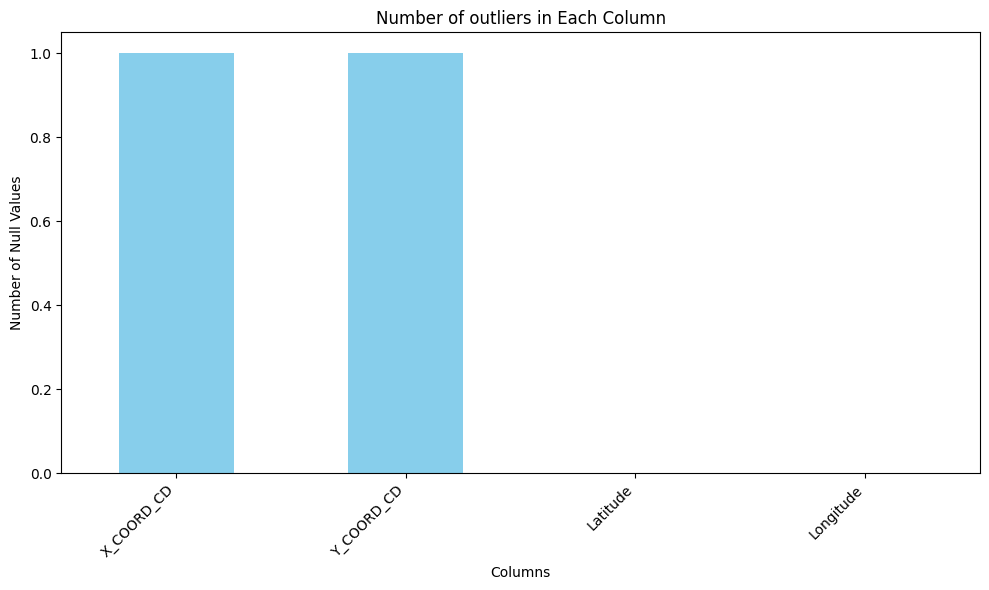

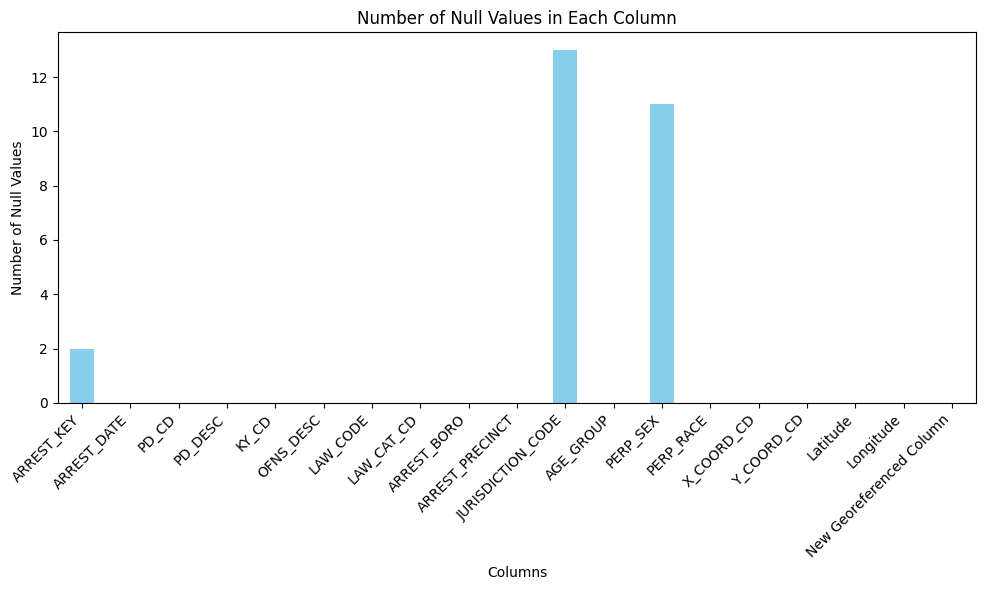

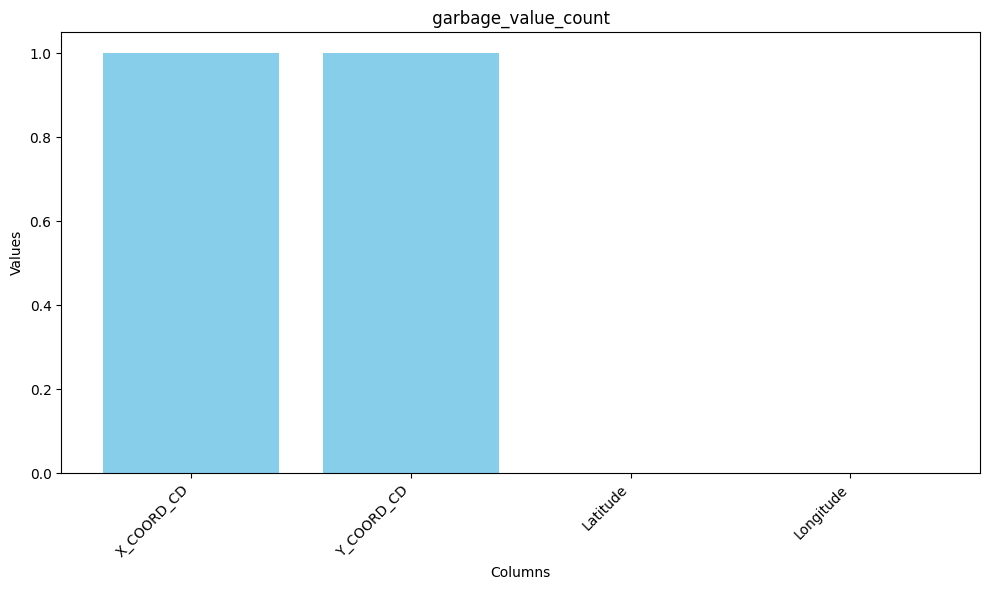

In [ ]:
#Calling all functions to test dataset for the quality
#csv_file_path= '/content/NYPD_Complaint_Data_Current__Year_To_Date__20231208.csv' #main dataset
csv_file_path= '/content/Sample Own Validation Dataset - Sheet1.csv'

dataframe = pd.read_csv(csv_file_path)
keywords = ['X_COORD', 'Y_COORD', 'Latitude', 'Longitude','AGE']
range_constraints = {
    'x_coord': (900000, 1060000),  # Example range for NYC projected coordinates
    'y_coord': (120000, 280000),   # Example range for NYC projected coordinates
    'latitude': (-90, 90),         # Geographical coordinate range
    'longitude': (-180, 180),       # Geographical coordinate range
    "AGE": (1,120)
}
date_formats = [
    '%Y-%m-%d', '%Y%m%d', '%Y-%m-%dT%H:%M:%S',
    '%m/%d/%Y', '%m-%d-%Y', '%m/%d/%y',
    '%d/%m/%Y', '%d-%m-%Y', '%d/%m/%y',
    '%d %b %Y', '%B %d, %Y', '%Y/%m/%d',
    '%y-%m-%d', '%d-%m-%y', '%m/%d/%Y %H:%M',
    '%Y-%m-%d %H:%M:%S', '%d/%m/%Y %H:%M:%S',
    '%Y-%m-%dT%H:%M:%SZ', '%Y-%m-%dT%H:%M:%S+00:00',
    '%Y-W%W', '%Y-W%W-%w', '%Y-%j'
]
matched_columns = fuzzy_match_columns(df, keywords)
num_cols, str_cols = segregate_columns(df)
sex_column = fuzzy_match_columns_all_matches(df, ['sex','gender'])

#outlier
print('\n Outlier Detection')
outlier_counts = outlier_detection(dataframe)
print("Outlier detection")
print(outlier_counts)
plt.figure(figsize=(10, 6))
outlier_counts.plot(kind='bar', color='skyblue')
plt.title('Number of outliers in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
print('\n')
#check_spelling (dataframe) --->> TO DO ----->>> VEDANGI- convert to count of each column instead of names--> change in code above of definition


#duplicate data
print("Duplicate row count")
duplicate_data(dataframe)
print('\n')

#null counts
null_counts = count_null_values(csv_file_path)
print("Null value counts")
print(null_counts)
print('\n')
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

#invalid values validity

print('\n Inavalid values validity')
invalid_counts = invalid_values_validity (dataframe, range_constraints, matched_columns)
print('\n')
plt.figure(figsize=(10, 6))
plt.bar(invalid_counts.keys(), invalid_counts.values(), color='skyblue')
plt.title(' garbage_value_count ')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
print('\n')

#invalid_value_counts
print('\n Inavalid values Count')
invalid_string_value_counts = count_invalid_string_values(dataframe, str_cols)
print(invalid_string_value_counts)
print('\n')
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of invalid string Valuecounts in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# numeric garbage value
print('\n Numeric garbage values')
garbage_value_count =  count_garbage_values_numeric(dataframe, num_cols)
print('\n')
plt.figure(figsize=(10, 6))
plt.bar(garbage_value_count.keys(), garbage_value_count.values(), color='skyblue')
plt.title(' garbage_value_count ')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# invalid sex values
#count_invalid_sex_values(dataframe, sex_column)---> check this output @archit


# find_pattern_and_count_mismatches
print('\n Pattern mismatch')
d={}
for column in num_cols:
  pattern, mismatches = find_pattern_and_count_mismatches(df, column)
  print(f"Column: {column}, Most Common Pattern: {pattern}, Mismatches: {mismatches}")
  d[column] = mismatches
plt.figure(figsize=(10, 6))
plt.bar(d.keys(), d.values(), color='skyblue')
plt.title(' find_pattern_and_count_mismatches ')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
print('\n')


#non_numeric_count
print('\n Count non-numeric')
non_numeric_count = count_non_numeric_in_numeric_columns(dataframe, num_cols)
print('\n')
plt.figure(figsize=(10, 6))
plt.bar(non_numeric_count.keys(), non_numeric_count.values(), color='skyblue')
plt.title(' non_numeric_count ')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()


#count_invalid_age_group_values(df, column_name) ---->>>> check @archit
#check_date_column_validity(dataframe)
#age_group(dataframe) ---->>>> check @archit


In [ ]:
import requests
from bs4 import BeautifulSoup

def search_nyc_open_data(keyword):
    #url = f'https://opendata.cityofnewyork.us/catalog/?q={keyword}'
    url = f'https://data.cityofnewyork.us/browse?q={keyword}'

    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract dataset links based on HTML tags and structure
        # Replace 'tag' and 'class' with the actual HTML tags and classes on the page
        dataset_links = []
        for link in soup.find_all('a', class_='dataset-item'):
            dataset_links.append(link['href'])

        return dataset_links

    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

# For our crime datasets
keyword = 'crime'
result = search_nyc_open_data(keyword)

if result:
    print(f'Dataset links related to "{keyword}":')
    for link in result:
        print(link)
else:
    print(result)
    print("No dataset links found.")